# Chapter3

## 抓資料集MNIST

In [1]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms #把資料轉成tenser方便計算

### 資料分成train和test兩類

In [2]:
train_dataset = dsets.MNIST(root='./data',  #放在home下面data資料夾
                  train=True,
                  transform=transforms.ToTensor(),  #轉成tenser
                  download=True) #存在目錄下->重新load會比較快

test_dataset = dsets.MNIST(root='./data',  #放在home下面data資料夾
                  train=False, #不用train不用train
                  transform=transforms.ToTensor(),  #轉成tenser
                  ) #預設不download

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
train_dataset.data.shape  #60000張圖(28x28pixel)

torch.Size([60000, 28, 28])

In [4]:
import matplotlib.pyplot as plt

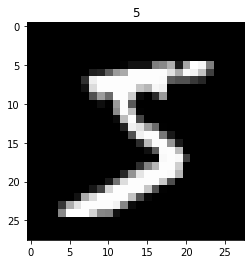

In [5]:
plt.imshow(train_dataset.data[0].numpy(),cmap='gray') #印第一張圖(tenser->numpy才吃得進去)、cmap(color-map)灰階
plt.title("%i" %train_dataset.targets[0]) #title
plt.show()

## 定操參數
1.input、output size

In [6]:
input_size = 28*28 
hidden_size = 500 #(介於28*28和10之間);一般來說中間層數越來越少(金字塔型)，低階feature(多)->組成高階feature(少);#隱藏層:低維向量x矩陣映射到高維空間不可能覆蓋掉所有高維空間
num_classes = 10  #input=28*28，output=10
num_epoch = 5   #要看資料幾次
batch_size = 100  #能整除資料大小 (每累積100筆->update)
learning_rate = 0.001


In [7]:
import torch.utils.data as Data

In [8]:
train_loader = Data.DataLoader(dataset = train_dataset,
                 batch_size = batch_size,
                 shuffle = True)  #shuffle data才不會讀到重覆的batch->訓練效果較好
test_loader = Data.DataLoader(dataset= test_dataset,
                 batch_size = batch_size,
                 shuffle=False)  #不做shuffle data

In [9]:
import torch.nn as nn

In [10]:
class Model(nn.Module): #繼承nn.Module
  def __init__(self, input_size,hidden_size,num_classes):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size) #輸入層->隱藏層
    self.relu = nn.ReLU() #activaction function
    self.fc2 = nn.Linear(hidden_size,num_classes) #隱藏層->輸出層
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [11]:
model = Model(input_size,hidden_size,num_classes)

In [12]:
import torch.optim as opt

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(),lr=learning_rate)

In [14]:
from torch.autograd import Variable

In [15]:
for epoch in range(num_epoch):
  for i, (images, labels) in enumerate(train_loader):
   images = Variable(images.view(-1,28*28))
   labels = Variable(labels)
   optimizer.zero_grad()
   outputs = model(images)
   loss = loss_fn(outputs, labels) #預測結果,答案
   loss.backward()
   optimizer.step()
   if (i+1)%100 == 0:
     print("Epoch:%d, Batch:%d, Loss:%.4f" 
        %(epoch+1, i+1, loss.data))

Epoch:1, Batch:100, Loss:0.4241
Epoch:1, Batch:200, Loss:0.2667
Epoch:1, Batch:300, Loss:0.2733
Epoch:1, Batch:400, Loss:0.2318
Epoch:1, Batch:500, Loss:0.2017
Epoch:1, Batch:600, Loss:0.1932
Epoch:2, Batch:100, Loss:0.0956
Epoch:2, Batch:200, Loss:0.1837
Epoch:2, Batch:300, Loss:0.0595
Epoch:2, Batch:400, Loss:0.1626
Epoch:2, Batch:500, Loss:0.0799
Epoch:2, Batch:600, Loss:0.0270
Epoch:3, Batch:100, Loss:0.0394
Epoch:3, Batch:200, Loss:0.0786
Epoch:3, Batch:300, Loss:0.0724
Epoch:3, Batch:400, Loss:0.0805
Epoch:3, Batch:500, Loss:0.0785
Epoch:3, Batch:600, Loss:0.0127
Epoch:4, Batch:100, Loss:0.0213
Epoch:4, Batch:200, Loss:0.0066
Epoch:4, Batch:300, Loss:0.0852
Epoch:4, Batch:400, Loss:0.0354
Epoch:4, Batch:500, Loss:0.0832
Epoch:4, Batch:600, Loss:0.0599
Epoch:5, Batch:100, Loss:0.0343
Epoch:5, Batch:200, Loss:0.0461
Epoch:5, Batch:300, Loss:0.0284
Epoch:5, Batch:400, Loss:0.0637
Epoch:5, Batch:500, Loss:0.0569
Epoch:5, Batch:600, Loss:0.0396


In [16]:
import torch

In [17]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1,28*28))
  outputs = model(images)
  _, pred = torch.max(outputs.data, 1) #_:最大值,pred:位置
  correct += (pred == labels).sum()
  total += labels.size(0)
print("Accuracy:%.3f%%" %(100.0* float(correct)/float(total)))

Accuracy:97.600%


In [18]:
for images, labels in test_loader:
  print(images.shape) #會多加一個沒用的維度(1)
  break

torch.Size([100, 1, 28, 28])


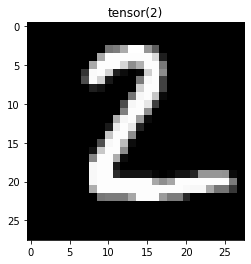

tensor([[ -6.0440,  -7.6152,  -2.2577,   0.1649, -11.3655,  -6.1183, -17.0543,
          10.8259,  -5.4014,  -3.1875],
        [ -3.4548,   3.4298,  11.9815,   0.4418, -20.3413,  -1.6705,  -2.9820,
         -14.9835,  -4.6308, -16.2409]], grad_fn=<AddmmBackward0>)
tensor([7, 2])


In [19]:
plt.imshow(images[1][0], cmap="gray")
plt.title(labels[1])
plt.show()
images_flat = Variable(images[:2].view(-1,28*28))
outputs = model(images_flat.data)
print(outputs)
_,pred_y = torch.max(outputs.data, -1)
print(pred_y)

## 儲存模型

In [20]:
torch.save(model.state_dict(),"model.pkl")

In [21]:
model2 = Model(input_size,hidden_size,num_classes) #先創好模型的殼
model2.load_state_dict(torch.load("model.pkl")) #load舊的model

<All keys matched successfully>

In [22]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1,28*28))
  outputs = model2(images)
  _, pred = torch.max(outputs.data, 1) #_:最大值,pred:位置
  correct += (pred == labels).sum()
  total += labels.size(0)
print("Accuracy:%.3f%%" %(100.0* float(correct)/float(total)))

Accuracy:97.600%


## 儲存整個模型

In [23]:
torch.save(model2,"model2.pkl") #模型複雜時容易出錯

In [24]:
model3 = torch.load("model2.pkl")

In [25]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1,28*28))
  outputs = model3(images)
  _, pred = torch.max(outputs.data, 1) #_:最大值,pred:位置
  correct += (pred == labels).sum()
  total += labels.size(0)
print("Accuracy:%.3f%%" %(100.0* float(correct)/float(total)))

Accuracy:97.600%


## Sequential

In [26]:
model4 = nn.Sequential(
  nn.Linear(input_size,hidden_size),  #隱藏層
  nn.ReLU(),  #activaction funtion
  nn.Linear(hidden_size, num_classes) #輸出層
)
print(model)
print(model4)
#兩種的物件不同

Model(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)


In [27]:
#optimizer = opt.SGD(model4.parameters(),lr=learning_rate, momentum=0.5) #動能
#optimizer = opt.Adagrad(model4.parameters(),lr=learning_rate)
#optimizer = opt.RMSprop(model4.parameters(),lr=learning_rate)
optimizer = opt.Adam(model4.parameters(),lr=learning_rate) #表現最好

In [28]:
for epoch in range(num_epoch):
  for i, (images, labels) in enumerate(train_loader):
   images = Variable(images.view(-1,28*28))
   labels = Variable(labels)
   optimizer.zero_grad()
   outputs = model4(images)
   loss = loss_fn(outputs, labels) #預測結果,答案
   loss.backward()
   optimizer.step()
   if (i+1)%100 == 0:
     print("Epoch:%d, Batch:%d, Loss:%.4f" 
        %(epoch+1, i+1, loss.data))

Epoch:1, Batch:100, Loss:0.2849
Epoch:1, Batch:200, Loss:0.1956
Epoch:1, Batch:300, Loss:0.2893
Epoch:1, Batch:400, Loss:0.1709
Epoch:1, Batch:500, Loss:0.1974
Epoch:1, Batch:600, Loss:0.2452
Epoch:2, Batch:100, Loss:0.1455
Epoch:2, Batch:200, Loss:0.1220
Epoch:2, Batch:300, Loss:0.1054
Epoch:2, Batch:400, Loss:0.0618
Epoch:2, Batch:500, Loss:0.1065
Epoch:2, Batch:600, Loss:0.0492
Epoch:3, Batch:100, Loss:0.0823
Epoch:3, Batch:200, Loss:0.0434
Epoch:3, Batch:300, Loss:0.0261
Epoch:3, Batch:400, Loss:0.0750
Epoch:3, Batch:500, Loss:0.1278
Epoch:3, Batch:600, Loss:0.0367
Epoch:4, Batch:100, Loss:0.1236
Epoch:4, Batch:200, Loss:0.0197
Epoch:4, Batch:300, Loss:0.1373
Epoch:4, Batch:400, Loss:0.0803
Epoch:4, Batch:500, Loss:0.0888
Epoch:4, Batch:600, Loss:0.0364
Epoch:5, Batch:100, Loss:0.0437
Epoch:5, Batch:200, Loss:0.0533
Epoch:5, Batch:300, Loss:0.0190
Epoch:5, Batch:400, Loss:0.0728
Epoch:5, Batch:500, Loss:0.0182
Epoch:5, Batch:600, Loss:0.0642
